Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


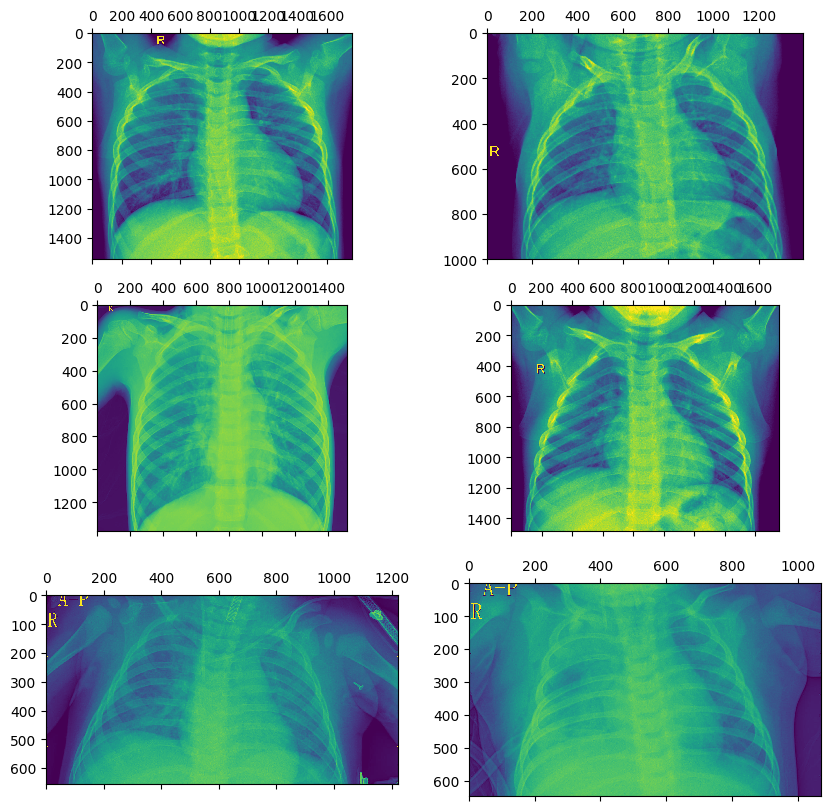

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 298, 298, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 147, 147, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 33, 33, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,605,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,983,009 (7.56 MB)

 Trainable params: 1,983,009 (7.56 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
11/41 ━━━━━━━━━━━━━━━━━━━━ 2:25 5s/step - accuracy: 0.7215 - loss: 0.7389

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.optimizers import Adam
import cv2
import os
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")
# Set paths to your local dataset
train_images = r"C:\Users\chara\Downloads\archive (1)\chest_xray\train"
validation_images = r"C:\Users\chara\Downloads\archive (1)\chest_xray\val"
test_images = r"C:\Users\chara\Downloads\archive (1)\chest_xray\test"

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_images,
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary'
)

# Validation data (no augmentation, just rescaling)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

validation_generator = test_datagen.flow_from_directory(
    validation_images,
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary'
)

# Visualizing some images
plot_image = plt.figure(figsize=(10, 10))
plot1 = plot_image.add_subplot(3, 2, 1)
plot2 = plot_image.add_subplot(3, 2, 2)
plot3 = plot_image.add_subplot(3, 2, 3)
plot4 = plot_image.add_subplot(3, 2, 4)
plot5 = plot_image.add_subplot(3, 2, 5)
plot6 = plot_image.add_subplot(3, 2, 6)
plot1.matshow(plt.imread(train_generator.filepaths[41]))
plot2.matshow(plt.imread(train_generator.filepaths[176]))
plot3.matshow(plt.imread(train_generator.filepaths[1553]))
plot4.matshow(plt.imread(train_generator.filepaths[354]))
plot5.matshow(plt.imread(train_generator.filepaths[2679]))
plot6.matshow(plt.imread(train_generator.filepaths[2710]))
plt.show()

# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

# Plot loss vs epochs
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(15, 10))
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['Training loss', 'Validation loss'], fontsize=16)
plt.title("Loss Vs Epochs", fontsize=18)
plt.xlabel("Num. of Epochs", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.savefig("loss_vs_epochs.png")  # Save the plot instead of showing it
print("Loss plot saved as 'loss_vs_epochs.png'")

# Plot accuracy vs epochs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.figure(figsize=(15, 10))
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['Training accuracy', 'Validation accuracy'], fontsize=16)
plt.title("Accuracy Vs Epochs", fontsize=18)
plt.xlabel("Num. of Epochs", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.savefig("accuracy_vs_epochs.png")  # Save the plot instead of showing it
print("Accuracy plot saved as 'accuracy_vs_epochs.png'")

# Save the trained model
model.save("trained_model.h5")

# Load the model for evaluation and predictions
model = tf.keras.models.load_model("trained_model.h5")

# Evaluate the model on the test dataset
test_generator = test_datagen.flow_from_directory(
    test_images,
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary'
)

eval_result = model.evaluate(test_generator)
print('Test Loss:', eval_result[0])
print('Test Accuracy:', eval_result[1])

# Prediction example: Normal
img_path = r"C:\Users\chara\Downloads\archive (1)\chest_xray\test\NORMAL\NORMAL2-IM-0337-0001.jpeg"
img = cv2.imread(img_path)
tempimg = img.copy()
img = cv2.resize(img, (300, 300))
img = img / 255.0
img = img.reshape(1, 300, 300, 3)
prediction = model.predict(img) >= 0.5
if prediction:
    prediction_text = "Pneumonia"
else:
    prediction_text = "Normal"
print(f"Prediction: {prediction_text}")
plt.imshow(tempimg)
plt.title(f"Prediction: {prediction_text}", fontsize=14)
plt.show()

# Prediction example: Pneumonia
img_path = r"C:\Users\chara\Downloads\archive (1)\chest_xray\test\PNEUMONIA\person8_virus_27.jpeg"
img = cv2.imread(img_path)
tempimg = img.copy()
img = cv2.resize(img, (300, 300))
img = img / 255.0
img = img.reshape(1, 300, 300, 3)
prediction = model.predict(img) >= 0.5
if prediction:
    prediction_text = "Pneumonia"
else:
    prediction_text = "Normal"
print(f"Prediction: {prediction_text}")
plt.imshow(tempimg)
plt.title(f"Prediction: {prediction_text}", fontsize=14)
plt.show()
